<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/NLP_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Cluster Analysis

---
- Jaccard Similarity
- Cosine Similarity


In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Lemmatization 
: 표제어 추출, 기본 단어형 추출 - 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단, ex, am/is/are -> be)

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [6]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [7]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [8]:
lemmatizer.lemmatize('has', 'v')

'have'

In [9]:
lemmatizer.lemmatize('are', 'v')

'be'

## Jaccard similarity

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it’s easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with very small samples or data sets with missing observations.

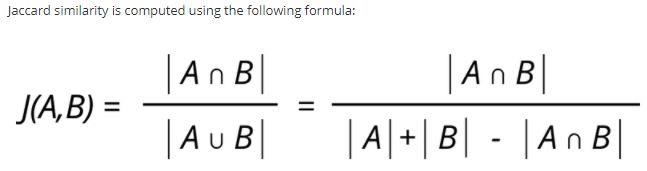

In [22]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

def jaccard_similarity(d1, d2):  
  lemmatizer = WordNetLemmatizer() 
  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))
  return inter/union

In [23]:
d1 = "Life will only change when you become more committed to your dreams than you are to your comfort zone"
d2 = "STAYING POSITIVE does not mean that things will turn out okay. Rather it is knowing that YOU will be okay no matter how things turn out"
d3 = "I speak to everyone in the same way, whether he is the garbage man of the president of the university"
print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.05714285714285714
0.03125
0.02702702702702703


## Cosine similarity

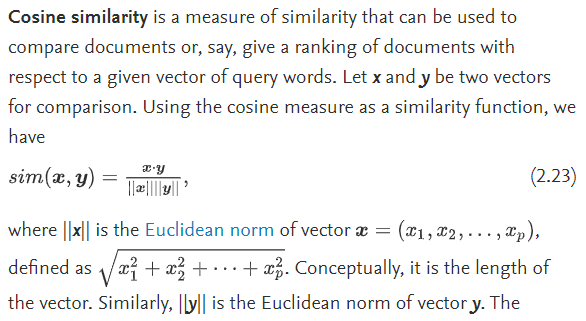

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]
tfidf = tiv.fit_transform(corpus).todense()
print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.08435865]]
[[0.04429924]]
[[0.0171261]]


# Korean (한국어) 분석

In [26]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 41.1MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [29]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:11 https://developer.download.nvidia.com/compute/cuda

## data (koean movie review)

In [39]:
import urllib.request
raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
raw[:5]

[b'id\tdocument\tlabel\n',
 b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n',
 b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x

In [40]:
raw = [x.decode() for x in raw[1:10000]]
reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

reviews[:5]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']

In [41]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]
print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec

In [42]:
from gensim.models import Word2Vec
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [43]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9667526483535767),
 ('듯', 0.965211033821106),
 ('마음', 0.959351658821106),
 ('모습', 0.9564294815063477),
 ('이야기', 0.9545278549194336),
 ('잔잔', 0.9541347026824951),
 ('표현', 0.9534268379211426),
 ('따뜻', 0.9530260562896729),
 ('흘러가', 0.9514758586883545),
 ('특징', 0.9499809741973877)]

## t-SNE (t-Stochastic Neighbor Embedding)

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [45]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.10344838,  0.21144488,  0.05064595, ..., -0.24116999,
        -0.10582157, -0.06835864],
       [ 0.27023554,  0.49852106, -0.06222792, ..., -0.66170305,
        -0.102079  , -0.40520748],
       [ 0.47032258,  0.14160378,  0.08492594, ..., -0.13002233,
        -0.36390334, -0.6055946 ],
       ...,
       [ 0.0121888 ,  0.02456104,  0.00114627, ..., -0.03443499,
        -0.01092237, -0.01281639],
       [ 0.02406488,  0.02229291, -0.00838656, ..., -0.03984194,
        -0.01654537, -0.02605567],
       [ 0.02262565,  0.02683739, -0.00370688, ..., -0.04558555,
        -0.02418203, -0.02875041]], dtype=float32)

In [47]:
import pandas as pd
transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[:10]

,x,y
어릴,-20.513033,14.472166
때,-4.420146,50.964596
보,-1.764691,62.310772
고,-3.152206,62.662197
지금,-3.921373,60.364780
다시,-3.853473,61.899906
봐도,-9.737645,63.590805
재밌,-14.961704,67.390808
어요,-14.723565,66.079445
ㅋㅋ,-17.354273,66.548943


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


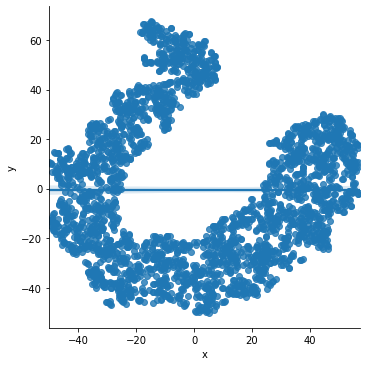

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('x', 'y', data=df)

## Clustering

Agglomerative Clustering (병합 군집을 이용한 비계층 군집화)
종료조건:
- ward - 클러스터내의 분삭 최소화
- average - 클러스터간의 평균 거리 최소화
- complete - 클러스터간의 최대 거리 최소화

Hierarchical Clustering (계층 군집화)

Partitioning Clustering (비계층/분리형 군집화)

### Agglomerative Clustering

**ward**

In [50]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([4, 2, 2, ..., 5, 5, 5])

In [51]:
results = df
results['predict'] = predict
results.head()

,x,y,predict
어릴,-20.513033,14.472166,4
때,-4.420146,50.964596,2
보,-1.764691,62.310772,2
고,-3.152206,62.662197,2
지금,-3.921373,60.364780,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


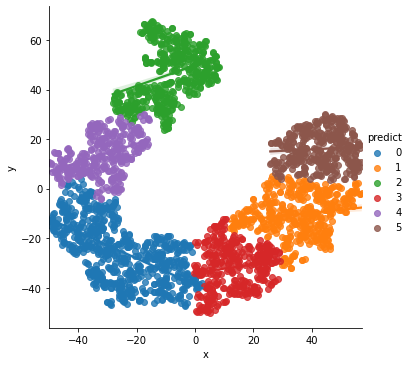

In [52]:
sns.lmplot('x', 'y', data=results, hue="predict")

**average**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


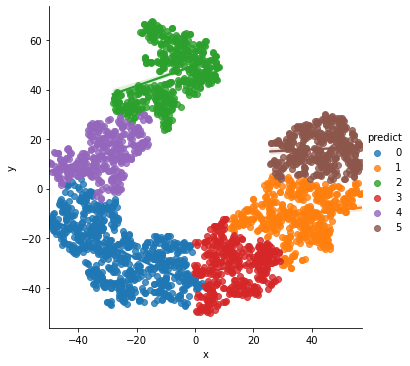

In [54]:
from sklearn.cluster import AgglomerativeClustering

avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = ward.fit_predict(df)

results = df
results['predict'] = predict
results.head()

sns.lmplot('x', 'y', data=results, hue="predict")

**complete**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


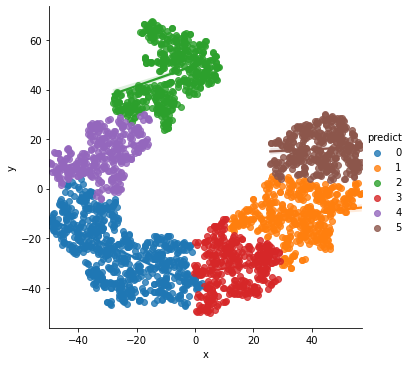

In [55]:
from sklearn.cluster import AgglomerativeClustering

complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = ward.fit_predict(df)

results = df
results['predict'] = predict
results.head()

sns.lmplot('x', 'y', data=results, hue="predict")

### Hierarchical Clustering

In [58]:
from scipy.spatial.distance import pdist, squareform

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,39.933425,51.420157,51.260876,48.840713,50.308364,50.326431,53.246595,51.969502,52.210807,44.954661,37.418155,44.730175,55.147072,39.861879,38.377174,70.380901,37.970127,41.371236,41.693123,43.217585,75.601880,40.664273,51.101617,49.384273,42.781936,39.852784,52.100145,44.473528,17.372580,40.716407,30.269892,38.937511,45.179539,62.880497,26.063615,38.903635,40.317812,38.627528,38.588973,...,58.010343,57.448838,50.926894,77.239766,56.969368,70.525007,49.021427,58.670164,65.748930,69.463253,60.607488,52.071809,56.881590,65.714931,58.281424,57.709214,69.587718,70.562318,61.217450,47.626969,67.597198,53.571265,54.288669,25.365660,58.651182,68.336458,66.923365,54.441992,53.936607,64.891082,58.735548,72.496749,47.208457,75.048882,75.500031,58.135202,49.471346,63.504495,74.752878,72.995194
1,39.933425,0.000000,11.652775,11.766119,9.413408,10.949983,13.700254,19.517810,18.292597,20.252494,12.609287,12.252207,12.328263,93.762475,11.330930,13.069484,83.526901,12.323476,12.192121,12.340924,9.833498,68.694340,79.142579,89.338970,10.120627,9.486806,78.580919,17.416188,10.255641,29.168227,8.988379,9.732413,10.226639,5.682021,85.616444,13.902948,10.516158,2.685512,1.786084,76.569768,...,57.679790,78.928361,64.455931,79.290471,47.768312,77.235849,63.551147,69.995697,89.593370,63.506900,84.081746,54.787663,60.426849,53.729388,66.058336,50.770569,80.481166,57.761161,52.876566,50.847347,71.535780,50.614484,49.760906,64.868758,81.500060,66.328065,57.981731,60.290472,80.729918,75.985620,79.684213,65.212412,74.817008,72.363658,77.562011,49.190655,57.263861,52.397132,65.101777,67.072331
2,51.420157,11.652775,0.000000,1.431327,2.904851,2.128808,8.075053,14.141002,13.495752,16.155406,16.439935,20.836184,16.308682,105.412854,18.730594,21.084273,91.944742,20.628388,18.598732,18.536424,14.933391,72.912025,90.131079,100.986821,6.511194,14.965755,89.640702,12.004770,10.939759,39.413560,16.132446,21.183355,18.324359,7.683190,95.628077,25.473671,18.585970,11.168830,12.814566,87.450889,...,64.337866,88.879114,73.594493,85.432036,52.891106,84.534522,72.894052,78.513726,99.708273,68.302243,94.229461,62.350746,67.801427,57.414168,74.055011,56.257581,88.545217,60.850211,57.768584,58.816667,78.449797,57.180419,55.999962,76.260868,91.602232,72.026545,62.281447,68.197194,91.382040,84.238005,89.538417,69.520113,85.652491,77.570165,83.775074,54.245891,65.735493,56.482445,68.702823,71.664410
3,51.260876,11.766119,1.431327,0.000000,2.422755,1.035791,6.650588,12.721007,12.065403,14.724317,17.573717,21.612577,17.428795,105.445148,19.604032,21.928510,92.912420,21.434417,19.564606,19.520118,15.929865,74.215375,89.721151,101.049898,7.794940,15.930356,89.255458,10.576944,9.837115,38.875034,16.975528,21.077986,19.117325,8.406572,96.351160,25.414545,19.386710,10.954647,12.761594,87.008049,...,65.466927,89.611410,74.454169,86.620163,54.122080,85.621549,73.722260,79.461510,100.412088,69.570019,94.924786,63.392030,68.867468,58.732181,75.062041,57.468449,89.553463,62.197825,59.020543,59.809930,79.569259,58.308972,57.154018,76.024412,92.305903,73.238057,63.572493,69.209533,91.960357,85.221915,90.289069,70.816454,86.178857,78.818843,84.956755,55.483143,66.679203,57.779275,70.033725,72.946492
4,48.840713,9.413408,2.904851,2.422755,0.000000,1.536627,6.651034,13.086404,12.220669,14.788058,16.423892,19.781475,16.247701,103.036328,17.926922,20.192231,91.282572,19.645267,18.043939,18.032533,14.502497,73.431503,87.352601,98.647356,7.349253,14.442940,86.878055,10.849759,8.250069,36.562775,15.272859,18.656922,17.323862,6.698296,94.377166,22.996904,17.602398,8.532076,10.352033,84.652573,...,64.175143,87.649559,72.662052,85.459809,53.112413,84.221472,71.886453,77.803008,98.4

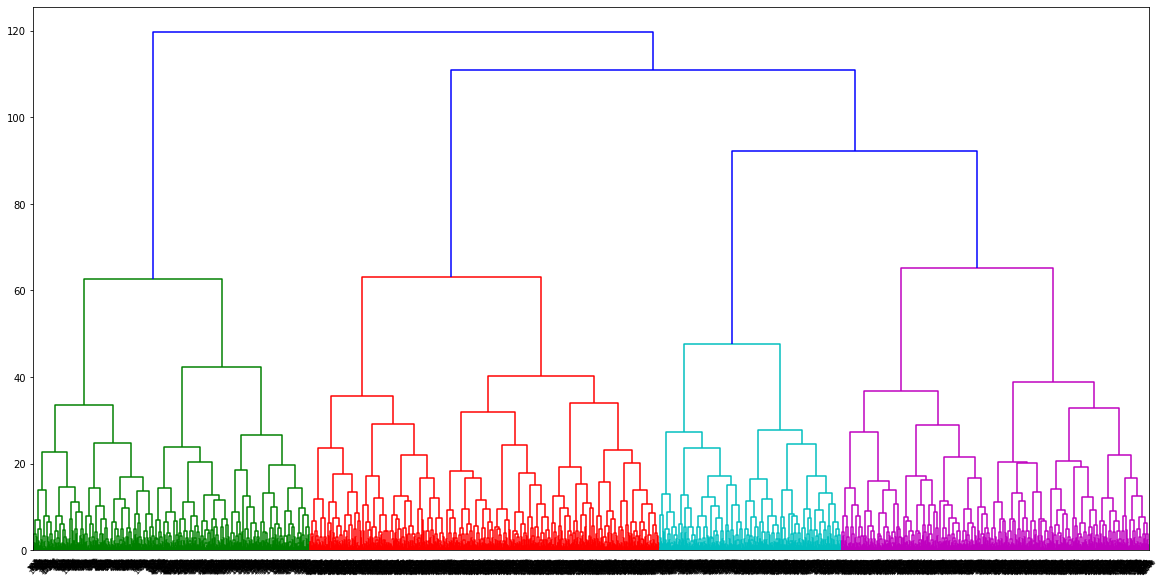

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

row_clusters = linkage(distmatrix, method='complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=7)
plt.show()

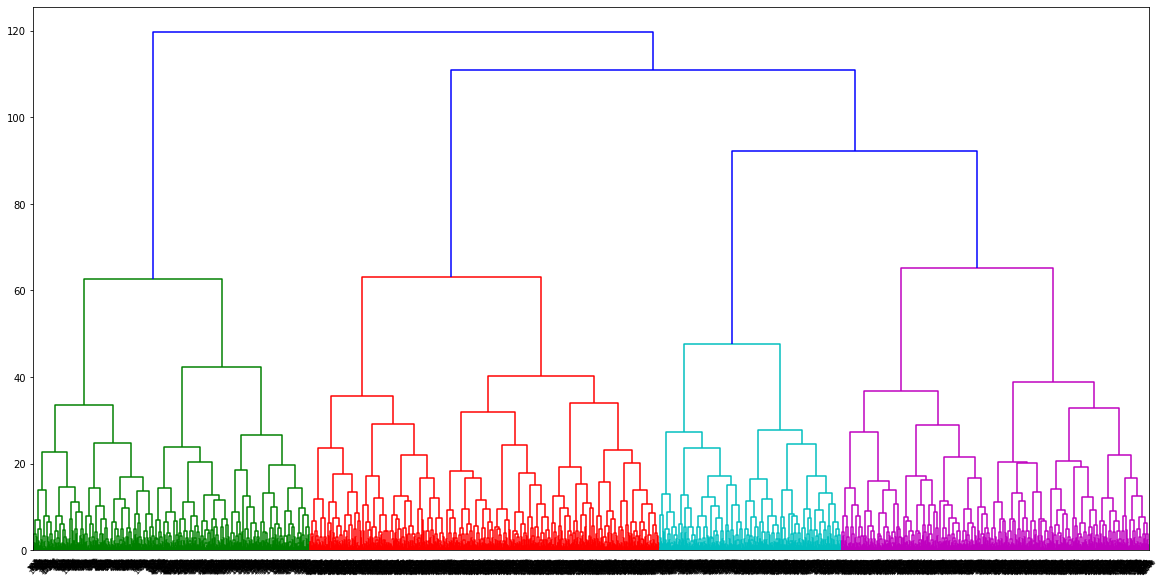

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergins = linkage(df, method='complete')
plt.figure(figsize=(20,10))
dendrogram(mergins, leaf_rotation=50, leaf_font_size=7)
plt.show()

### Partitioning Clustering

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([2, 0, 0, ..., 3, 3, 3], dtype=int32)

In [67]:
results = df
results['predict'] = predict
results.head()

,x,y,predict
어릴,-20.513033,14.472166,2
때,-4.420146,50.964596,0
보,-1.764691,62.310772,0
고,-3.152206,62.662197,0
지금,-3.921373,60.364780,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


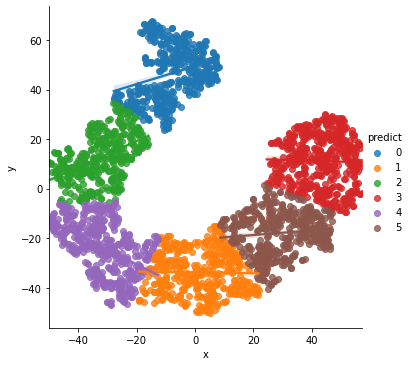

In [68]:
sns.lmplot('x', 'y', data=results, hue="predict")